# User Segmentation using Clustering Techniques

Customer Segmentation is one the most important applications of unsupervised learning. Using clustering techniques, one can identify the several segments of customers allowing them to target the potential user base.


This notebook has the following sections

1. Importing Necessary Libraries
2. Loading the data
3. Exploratory Data Analysis
4. Applying clustering Techniques
5. Finding the optimal Clusters
6. Applying PCA
7. Find the optimal clusters 
8. Visualization of clusters


#### 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd

# for standardizing the dataset
from sklearn.preprocessing import StandardScaler

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# for the clustering techniques
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans

#### Loading the dataset

In [57]:
df_users=pd.read_csv('user_side_data_raw.tsv',sep='\t',names=['id','gender','age','country','date'])

In [58]:
df_users.head()

,id,gender,age,country,date
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007"
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006"


In [59]:
df_users.shape

(359347, 5)

In [60]:
df_users.isnull().sum()

id             0
gender     32775
age        74900
country        0
date           0
dtype: int64

In [61]:
# proportions of null values
(df_users.gender.isnull().sum()/df_users.shape[0])*100

9.12071062232327

In [62]:
(df_users.age.isnull().sum()/df_users.shape[0])*100

20.84336310029025

In [63]:
df_users.gender.fillna(df_users.gender.mode()[0],inplace=True)

In [64]:
df_users.age.fillna(int(df_users.age.mean()),inplace=True)

In [65]:
df_users.isnull().sum()

id         0
gender     0
age        0
country    0
date       0
dtype: int64

# Exploratory data analysis

In [66]:
df_users.gender.value_counts()

m    274417
f     84930
Name: gender, dtype: int64

In [67]:
df_users.age.mean()

25.07761022076155

In [68]:
df_users.country.value_counts()

United States               67044
Germany                     31651
United Kingdom              29902
Poland                      20987
Russian Federation          19833
Brazil                      14534
Sweden                      13122
Spain                       13051
Finland                     11579
Netherlands                  9650
Canada                       8679
France                       7529
Italy                        7525
Australia                    7135
Japan                        6637
Turkey                       6452
Norway                       5155
Mexico                       4834
Czech Republic               4774
Ukraine                      4396
Belgium                      3803
Portugal                     3196
Switzerland                  3053
Bulgaria                     2800
Austria                      2796
Chile                        2794
Argentina                    2640
Romania                      2636
Denmark                      2508
Hungary       

In [69]:
df_users['joined year']=df_users.date.apply(lambda x:x[-4:])

In [70]:
df_users.head()

,id,gender,age,country,date,joined year
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",2007
1,00001411dc427966b17297bf4d69e7e193135d89,f,25.0,Canada,"Dec 4, 2007",2007
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,m,25.0,Germany,"Sep 1, 2006",2006
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008",2008
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006",2006


In [71]:
df_users.drop(['date'],axis=1,inplace=True)

In [72]:
df_users.set_index(['id'],inplace=True)

In [73]:
df_users.head()

,gender,age,country,joined year
id,,,,
00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,2007
00001411dc427966b17297bf4d69e7e193135d89,f,25.0,Canada,2007
00004d2ac9316e22dc007ab2243d6fcb239e707d,m,25.0,Germany,2006
000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,2008
00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,2006


In [74]:
df_seg=pd.get_dummies(df_users,['gender','country','joined year'])

In [75]:
df_seg.head()

,age,gender_f,gender_m,country_Afghanistan,country_Albania,country_Algeria,country_American Samoa,country_Andorra,country_Angola,country_Anguilla,...,country_Zambia,country_Zimbabwe,joined year_2002,joined year_2003,joined year_2004,joined year_2005,joined year_2006,joined year_2007,joined year_2008,joined year_2009
id,,,,,,,,,,,,,,,,,,,,,
00000c289a1829a808ac09c00daf10bc3c4e223b,22.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
00001411dc427966b17297bf4d69e7e193135d89,25.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
00004d2ac9316e22dc007ab2243d6fcb239e707d,25.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,19.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00007a47085b9aab8af55f52ec8846ac479ac4fe,28.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [82]:
df_users.describe(include='all')

,gender,age,country,joined year
count,359347,359347.000000,359347,359347
unique,2,NaN,239,8
top,m,NaN,United States,2008
freq,274417,NaN,67044,120808
mean,NaN,25.077610,NaN,NaN
std,NaN,19.276048,NaN,NaN
min,NaN,-1337.000000,NaN,NaN
25%,NaN,21.000000,NaN,NaN
50%,NaN,25.000000,NaN,NaN
75%,NaN,26.000000,NaN,NaN


In [83]:
from sklearn.preprocessing import LabelEncoder
lb_encoder=LabelEncoder()

In [84]:
countries=lb_encoder.fit_transform(df_users.country)

In [89]:
year_encoder=LabelEncoder()
years=lb_encoder.fit_transform(df_users['joined year'])

In [90]:
years

array([5, 5, 4, ..., 5, 3, 6])

In [91]:
gender_encoder=LabelEncoder()
genders=lb_encoder.fit_transform(df_users.gender)

In [92]:
genders

array([0, 0, 1, ..., 1, 1, 1])

### Applying clustering Techniques 

Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a metric that reflects the strength of relationship between two data objects. Clustering is mainly used for exploratory data mining.


**we have two ways to find the optimal no.of clusters**
1. By Hierarchical clustering we can find the optimal no.of clusters by observing the dendogram
2. By ploting the WCSS of a range of cluster using Bottom up approach


The first option crashed the kernel because of lack of enough hardware requirement in the laptop.I'm opting for second one

K-Means attempts to classify data without having first been trained with labeled data. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.

In [95]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_seg)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

134258498.48275355
28492159.521132484
15087558.004872149
8737924.294237286
5680436.533094462
4150917.3284346457
3079109.5899161794
2474939.295240826
2105803.1053973585
1820427.9377313748


In [96]:
wcss

[134258498.48275355,
 28492159.521132484,
 15087558.004872149,
 8737924.294237286,
 5680436.533094462,
 4150917.3284346457,
 3079109.5899161794,
 2474939.295240826,
 2105803.1053973585,
 1820427.9377313748]

In [107]:
f=open('wcss.txt','w')
for i in wcss:
    f.write(str(i))
    f.write('\n')
f.close()

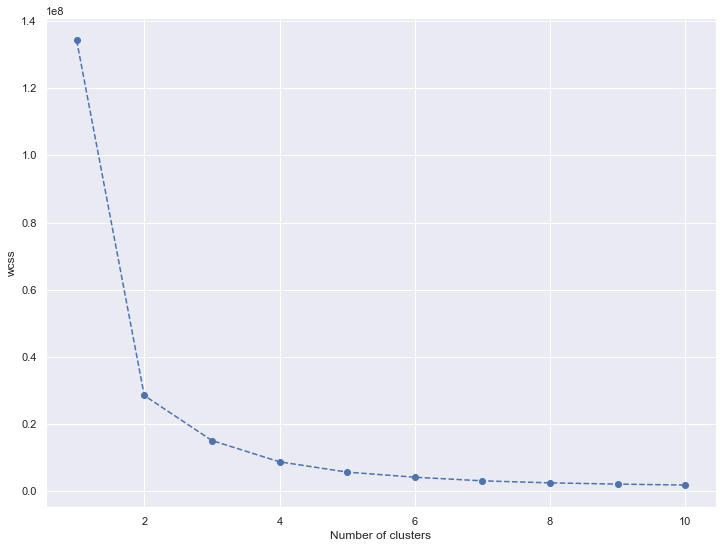

In [109]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS) then we select the number of clusters where the change in WCSS begins to level off (elbow method).

WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.

In [110]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(df_seg)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [111]:
df_segm_kmeans=df_seg.copy()
df_segm_kmeans['segment K-means']=kmeans.labels_

### Applying the clustering technique with Label Encoding

In [113]:
df_users.head()

,gender,age,country,joined year
id,,,,
00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,2007
00001411dc427966b17297bf4d69e7e193135d89,f,25.0,Canada,2007
00004d2ac9316e22dc007ab2243d6fcb239e707d,m,25.0,Germany,2006
000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,2008
00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,2006


In [114]:
df_users_en=df_users.copy()

In [116]:
df_users_en['gender']=genders
df_users_en['country']=countries
df_users_en['joined year']=years

In [117]:
df_users_en.head()

,gender,age,country,joined year
id,,,,
00000c289a1829a808ac09c00daf10bc3c4e223b,0,22.0,79,5
00001411dc427966b17297bf4d69e7e193135d89,0,25.0,37,5
00004d2ac9316e22dc007ab2243d6fcb239e707d,1,25.0,79,4
000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,1,19.0,136,6
00007a47085b9aab8af55f52ec8846ac479ac4fe,1,28.0,225,4


In [130]:
test_wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_users_en)
    test_wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

2086135898.8955686
431290273.3553824
290135430.90301967
184763290.25917345
86585872.56605095
66684087.42352505
52578488.68448655
44171563.90171374
38522141.4220099
33634118.314277805


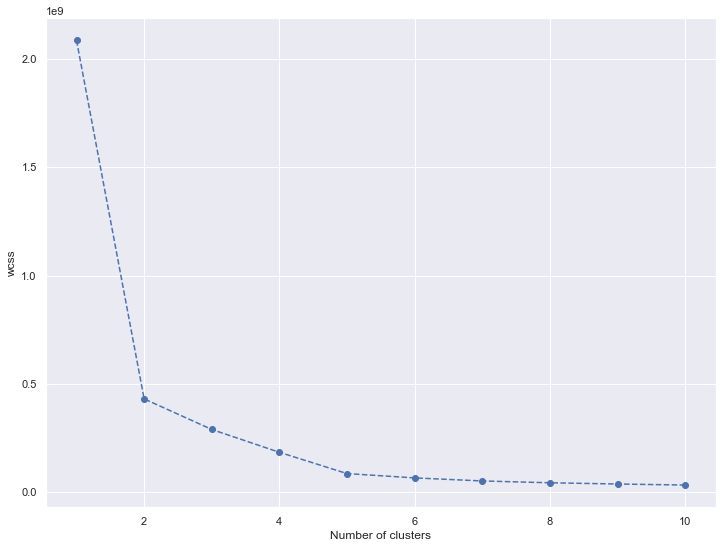

In [131]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),test_wcss,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

From the above graph we can conclude that there are three optimal clusters can be formed using Elbow-point method

In [136]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(df_users_en)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [137]:
df_en_segm_kmeans=df_users_en.copy()
df_en_segm_kmeans['segment K-means']=kmeans.labels_

In [138]:
df_en_segm_kmeans.head()

,gender,age,country,joined year,segment K-means
id,,,,,
00000c289a1829a808ac09c00daf10bc3c4e223b,0,22.0,79,5,0
00001411dc427966b17297bf4d69e7e193135d89,0,25.0,37,5,0
00004d2ac9316e22dc007ab2243d6fcb239e707d,1,25.0,79,4,0
000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,1,19.0,136,6,2
00007a47085b9aab8af55f52ec8846ac479ac4fe,1,28.0,225,4,1


In [140]:
df_en_segm_kmeans.groupby(['segment K-means']).count()

,gender,age,country,joined year
segment K-means,,,,
0,139132,139132,139132,139132
1,143475,143475,143475,143475
2,76740,76740,76740,76740


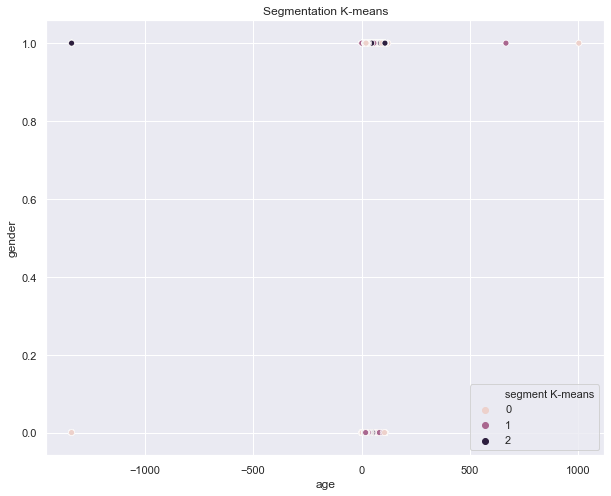

In [147]:
x_axis=df_en_segm_kmeans['age']
y_axis=df_en_segm_kmeans['gender']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_en_segm_kmeans['segment K-means'])
plt.title('Segmentation K-means')
plt.show()

# PCA

It is a common practice to apply PCA (principal component analysis) before a clustering algorithm (such as k-means). It is believed that it improves the clustering results in practice (noise reduction).

In [148]:
df_seg.head()

,age,gender_f,gender_m,country_Afghanistan,country_Albania,country_Algeria,country_American Samoa,country_Andorra,country_Angola,country_Anguilla,...,country_Zambia,country_Zimbabwe,joined year_2002,joined year_2003,joined year_2004,joined year_2005,joined year_2006,joined year_2007,joined year_2008,joined year_2009
id,,,,,,,,,,,,,,,,,,,,,
00000c289a1829a808ac09c00daf10bc3c4e223b,22.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
00001411dc427966b17297bf4d69e7e193135d89,25.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
00004d2ac9316e22dc007ab2243d6fcb239e707d,25.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,19.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00007a47085b9aab8af55f52ec8846ac479ac4fe,28.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [149]:
df_seg.shape

(359347, 250)

In [151]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(df_seg)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**On the applying the pca on the dataset we can get the variance explained by each column/field. As a rule of thumb we have to retain the components explaining more than 80% variance**

In [152]:
pca.explained_variance_ratio_

array([9.94508186e-01, 9.73522817e-04, 8.20579773e-04, 5.95721570e-04,
       4.23043046e-04, 3.16620110e-04, 2.36815861e-04, 2.24564767e-04,
       1.94659919e-04, 1.52096641e-04, 1.32009525e-04, 1.04611178e-04,
       9.71849613e-05, 9.02506282e-05, 7.90944697e-05, 6.88602904e-05,
       6.24582865e-05, 5.91033460e-05, 5.59826220e-05, 5.40947256e-05,
       5.09339156e-05, 4.85152270e-05, 4.18295955e-05, 3.72284667e-05,
       3.57277045e-05, 3.34830053e-05, 2.97241284e-05, 2.62015022e-05,
       2.33735151e-05, 2.21352569e-05, 2.08321749e-05, 2.08007512e-05,
       2.00785538e-05, 1.96385456e-05, 1.88673504e-05, 1.61374506e-05,
       1.47573341e-05, 1.44643374e-05, 1.40240498e-05, 1.37709835e-05,
       1.31064515e-05, 1.23692322e-05, 1.18111175e-05, 1.10000004e-05,
       1.00279260e-05, 9.47876445e-06, 9.14714313e-06, 8.86760541e-06,
       8.67800866e-06, 7.70307208e-06, 7.67159210e-06, 5.76894105e-06,
       5.19930343e-06, 4.80708919e-06, 4.56295442e-06, 4.46261434e-06,
      

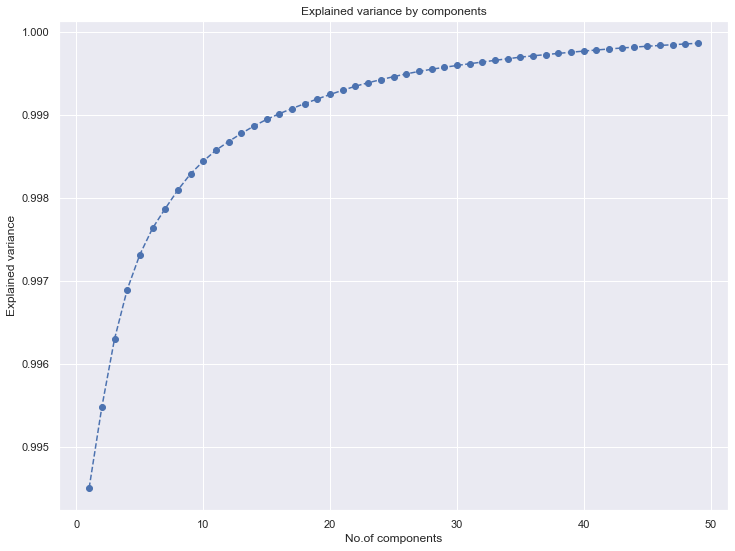

In [158]:
plt.figure(figsize=(12,9))
plt.plot(range(1,50),pca.explained_variance_ratio_.cumsum()[:49],marker='o',linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('No.of components')
plt.ylabel('Explained variance')
plt.show()

From the above graph we can see that the 10 components are explaining more than 98% variance itself

In [159]:
pca=PCA(n_components=10)
pca.fit(df_seg)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [160]:
scores_pca=pca.transform(df_seg)

In [162]:
scores_pca

array([[ 3.07924934e+00, -9.65742459e-01,  8.40539686e-01, ...,
         7.06646168e-01,  3.95826494e-01,  7.82931891e-03],
       [ 7.93175181e-02, -9.83262193e-01,  8.53291430e-01, ...,
        -2.34652219e-03, -9.89962221e-02, -5.87799257e-02],
       [ 7.68214240e-02,  4.37602123e-01,  8.39268432e-02, ...,
         6.78797567e-01,  3.46492084e-01,  2.94501037e-02],
       ...,
       [ 5.07686694e+00,  3.86188080e-01,  6.60299973e-01, ...,
        -7.11075126e-02,  1.01004688e-01,  7.92880964e-03],
       [ 5.07701841e+00,  3.97111786e-01,  8.15172939e-03, ...,
         3.78636281e-01, -5.27255987e-01, -6.20991725e-01],
       [ 4.07736262e+00,  2.01415376e-01, -7.59616724e-01, ...,
        -4.35712057e-02, -8.14134376e-02, -1.57825945e-02]])

In [163]:
pca_wcss=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    pca_wcss.append(kmeans_pca.inertia_)
    print(kmeans_pca.inertia_)

134049835.27223751
28283517.23694611
14868999.474239191
8548741.72116922
5472147.923170721
3942546.1647670097
2881208.2835925072
2260121.1429546513
1886633.3945844688
1612138.7509535719


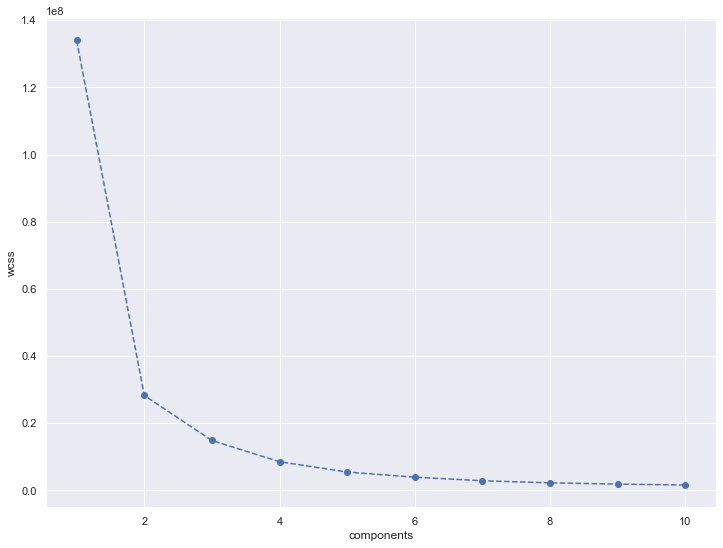

In [164]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),pca_wcss,marker='o',linestyle='--')
plt.xlabel('components')
plt.ylabel('wcss')
plt.show()

From the above graph we can conclude to take optimal no.of clusters to be 3 which supports the Kmeans without PCA and as well as without LabelEncoding

In [165]:
kmeans_pca=KMeans(n_clusters=3,init='k-means++',random_state=42)

In [166]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [167]:
df_users_en.head()

,gender,age,country,joined year
id,,,,
00000c289a1829a808ac09c00daf10bc3c4e223b,0,22.0,79,5
00001411dc427966b17297bf4d69e7e193135d89,0,25.0,37,5
00004d2ac9316e22dc007ab2243d6fcb239e707d,1,25.0,79,4
000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,1,19.0,136,6
00007a47085b9aab8af55f52ec8846ac479ac4fe,1,28.0,225,4


In [171]:
df_segm_kmeans_pca=df_users.copy()
df_segm_kmeans_pca['segment K-means']=kmeans_pca.labels_

In [172]:
df_segm_kmeans_pca.head()

,gender,age,country,joined year,segment K-means
id,,,,,
00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,2007,0
00001411dc427966b17297bf4d69e7e193135d89,f,25.0,Canada,2007,0
00004d2ac9316e22dc007ab2243d6fcb239e707d,m,25.0,Germany,2006,0
000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,2008,0
00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,2006,0


In [175]:
df_segm_kmeans_pca=pd.concat([df_segm_kmeans_pca.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)

In [176]:
df_segm_kmeans_pca.columns.values[-10:]=['component_'+str(i) for i in range(1,11)]

In [188]:
df_segm_kmeans_pca['Labels']=df_segm_kmeans_pca['segment K-means'].map({
    0:"cluster_1",
    1:"cluster_2",
    2:"cluster_3"            
})

In [189]:
df_segm_kmeans_pca.head()

,gender,age,country,joined year,segment K-means,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,Labels
0,f,22.0,Germany,2007,0,3.079249,-0.965742,0.840540,-0.434122,-0.271597,-0.097946,-0.395199,0.706646,0.395826,0.007829,cluster_1
1,f,25.0,Canada,2007,0,0.079318,-0.983262,0.853291,-0.389060,-0.142788,-0.104055,0.059069,-0.002347,-0.098996,-0.058780,cluster_1
2,m,25.0,Germany,2006,0,0.076821,0.437602,0.083927,0.725797,-0.504299,-0.281414,-0.455975,0.678798,0.346492,0.029450,cluster_1
3,m,19.0,Mexico,2008,0,6.077364,0.200957,-0.766265,-0.276504,-0.052819,-0.101826,0.002710,-0.052166,-0.080768,-0.017021,cluster_1
4,m,28.0,United States,2006,0,-2.923463,0.394624,0.137001,0.997569,0.572417,-0.371891,-0.118602,-0.063246,0.063210,0.007534,cluster_1


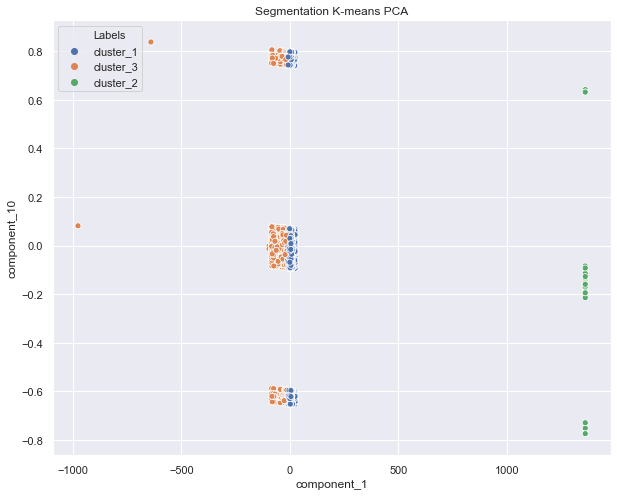

In [190]:
x_axis=df_segm_kmeans_pca['component_1']
y_axis=df_segm_kmeans_pca['component_10']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans_pca['Labels'])
plt.title('Segmentation K-means PCA')
plt.show()

In [186]:
import pickle

pickle.dump(pca,open('pca.pickle','wb'))

pickle.dump(kmeans_pca,open('kmeans_pca.pickle','wb'))

In [191]:
df_segm_kmeans_pca.to_csv('user_segm_kmeans_pca.csv',index=False)